<a href="https://colab.research.google.com/github/nlan082/Xac_suat_thong_ke/blob/main/XSTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Đọc dữ liệu từ file
df = pd.read_excel('/content/drive/MyDrive/xstk_dulieumahoa (2).xlsx')

# Ánh xạ chi tiêu thành VNĐ
mapping_chi_tieu = {
    0: 50_000,
    1: 200_000,
    2: 400_000,
    3: 750_000,
    4: 1_500_000
}
df['chi_tieu_vnd'] = df['chi_tieu_thang_mahoa'].map(mapping_chi_tieu)

# Tách dữ liệu theo giới tính
df_nu = df[df['gioi_tinh_mahoa'] == 1]['chi_tieu_vnd'].reset_index(drop=True)
df_nam = df[df['gioi_tinh_mahoa'] == 0]['chi_tieu_vnd'].reset_index(drop=True)

# Hàm chuyển số sang chuỗi định dạng thập phân rõ ràng (loại bỏ 1e+)
def to_plain(val, ndigits=2):
    return np.format_float_positional(val, precision=ndigits, unique=False, fractional=True, trim='k')

# Hàm tính thống kê mô tả
def tinh_bang_thong_ke(series):
    x = series.values
    mean = np.mean(x)
    diff = x - mean
    diff_sq = diff ** 2
    var = np.var(x, ddof=1)
    std = np.sqrt(var)
    cv = round(std / mean * 100, 2)

    # Tạo bảng chi tiết
    df_out = pd.DataFrame({
        'STT': range(1, len(x)+1),
        'x': [to_plain(i, 0) for i in x],
        'x - x̄': [to_plain(i, 2) for i in diff],
        '(x - x̄)^2': [to_plain(i, 2) for i in diff_sq]
    })

    # Thống kê tóm tắt
    summary = {
        'Cỡ mẫu': len(x),
        'Tổng x': to_plain(np.sum(x), 0),
        'Trung bình': to_plain(mean, 2),
        'Tổng (x - x̄)^2': to_plain(np.sum(diff_sq), 2),
        'Phương sai': to_plain(var, 2),
        'Độ lệch chuẩn': to_plain(std, 2),
        'Hệ số biến thiên (%)': cv
    }

    return df_out, summary

# Tính thống kê cho nữ và nam
bang_nu, thongke_nu = tinh_bang_thong_ke(df_nu)
bang_nam, thongke_nam = tinh_bang_thong_ke(df_nam)
# Bước 6: Hiển thị bảng và thống kê
print("=== 📊 BẢNG THỐNG KÊ CHI TIẾT - NỮ ===")
display(bang_nu)
print("\n📌 KẾT QUẢ THỐNG KÊ - NỮ:")
for k, v in thongke_nu.items():
    print(f"{k}: {v}")

print("\n=== 📊 BẢNG THỐNG KÊ CHI TIẾT - NAM ===")
display(bang_nam)
print("\n📌 KẾT QUẢ THỐNG KÊ - NAM:")
for k, v in thongke_nam.items():
    print(f"{k}: {v}")



=== 📊 BẢNG THỐNG KÊ CHI TIẾT - NỮ ===


,STT,x,x - x̄,(x - x̄)^2
0,1,750000.,431640.62,186313629150.39
1,2,200000.,-118359.38,14008941650.39
2,3,200000.,-118359.38,14008941650.39
3,4,400000.,81640.62,6665191650.39
4,5,50000.,-268359.38,72016754150.39
...,...,...,...,...
123,124,200000.,-118359.38,14008941650.39
124,125,50000.,-268359.38,72016754150.39
125,126,50000.,-268359.38,72016754150.39
126,127,750000.,431640.62,186313629150.39



📌 KẾT QUẢ THỐNG KÊ - NỮ:
Cỡ mẫu: 128
Tổng x: 40750000.
Trung bình: 318359.38
Tổng (x - x̄)^2: 14519355468750.00
Phương sai: 114325633612.20
Độ lệch chuẩn: 338120.74
Hệ số biến thiên (%): 106.21

=== 📊 BẢNG THỐNG KÊ CHI TIẾT - NAM ===


,STT,x,x - x̄,(x - x̄)^2
0,1,200000.,-250000.00,62500000000.00
1,2,50000.,-400000.00,160000000000.00
2,3,200000.,-250000.00,62500000000.00
3,4,750000.,300000.00,90000000000.00
4,5,400000.,-50000.00,2500000000.00
...,...,...,...,...
65,66,400000.,-50000.00,2500000000.00
66,67,200000.,-250000.00,62500000000.00
67,68,750000.,300000.00,90000000000.00
68,69,750000.,300000.00,90000000000.00



📌 KẾT QUẢ THỐNG KÊ - NAM:
Cỡ mẫu: 70
Tổng x: 31500000.
Trung bình: 450000.00
Tổng (x - x̄)^2: 11910000000000.00
Phương sai: 172608695652.17
Độ lệch chuẩn: 415462.03
Hệ số biến thiên (%): 92.32


In [ ]:
# === Xuất từng file Excel riêng ===
bang_nu_path = '/content/bang_thong_ke_nu.xlsx'
bang_nam_path = '/content/bang_thong_ke_nam.xlsx'

with pd.ExcelWriter(bang_nu_path) as writer:
    bang_nu.to_excel(writer, sheet_name='Bang chi tiet', index=False)

with pd.ExcelWriter(bang_nam_path) as writer:
    bang_nam.to_excel(writer, sheet_name='Bang chi tiet', index=False)


In [ ]:
pip install pandas scipy openpyxl


In [ ]:
# Bước 1: Import thư viện cần thiết
import pandas as pd
from scipy import stats

# Bước 2: Đọc dữ liệu từ file Excel
data_nam = pd.read_excel("/content/bang_thong_ke_nam.xlsx")  # File chứa cột 'x' cho sinh viên nam
data_nu = pd.read_excel("/content/bang_thong_ke_nu.xlsx")    # File chứa cột 'x' cho sinh viên nữ

# Bước 3: Gán nhãn giới tính
data_nam["group"] = "Nam"
data_nu["group"] = "Nữ"

# Bước 4: Gộp dữ liệu
data_all = pd.concat([data_nam, data_nu], ignore_index=True)

# Bước 5: Lấy dữ liệu từng nhóm
x_nam = data_all[data_all["group"] == "Nam"]["x"]
x_nu = data_all[data_all["group"] == "Nữ"]["x"]

# --------------------------------------------
# PHẦN 1: KIỂM ĐỊNH T HAI MẪU ĐỘC LẬP (Welch’s t-test)
# --------------------------------------------
print(" KIỂM ĐỊNH T (Welch’s t-test)")
print("-------------------------------")
t_stat, p_val_ttest = stats.ttest_ind(x_nam, x_nu, equal_var=False)
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value    : {p_val_ttest:.4f}")
if p_val_ttest < 0.05:
    print(" Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa hai nhóm (t-test)")
else:
    print("Kết luận: Không có sự khác biệt có ý nghĩa thống kê (t-test)")

# --------------------------------------------
# PHẦN 2: KIỂM ĐỊNH ANOVA MỘT CHIỀU
# --------------------------------------------
print(" PHÂN TÍCH ANOVA MỘT CHIỀU")
print("-------------------------------")
anova_result = stats.f_oneway(x_nam, x_nu)
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"p-value    : {anova_result.pvalue:.4f}")
if anova_result.pvalue < 0.05:
    print("Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa hai nhóm (ANOVA)")
else:
    print("Kết luận: Không có sự khác biệt có ý nghĩa thống kê (ANOVA)")


 KIỂM ĐỊNH T (Welch’s t-test)
-------------------------------
t-statistic: 2.271
p-value    : 0.0249
 Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa hai nhóm (t-test)
 PHÂN TÍCH ANOVA MỘT CHIỀU
-------------------------------
F-statistic: 5.816
p-value    : 0.0168
Kết luận: Có sự khác biệt có ý nghĩa thống kê giữa hai nhóm (ANOVA)


<ipython-input-20-4057610572>:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x_nam, x_nu], labels=["Nam", "Nữ"], patch_artist=True,


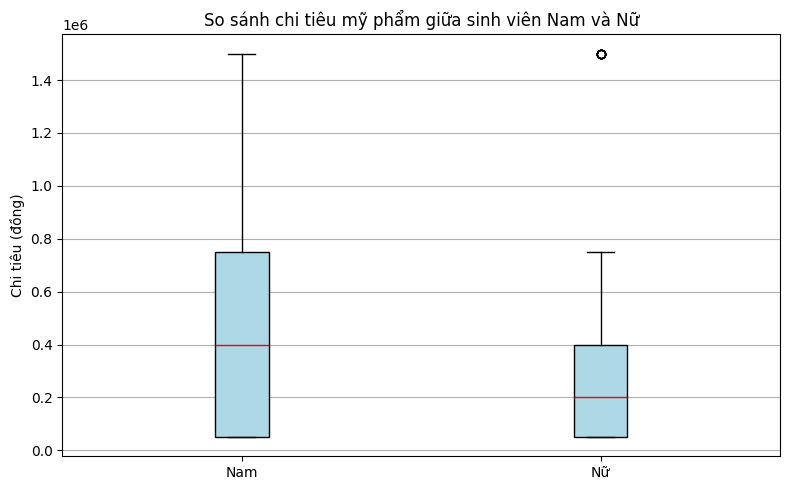

KẾT QUẢ PHÂN TÍCH KHOẢNG TIN CẬY
----------------------------------------
Chênh lệch trung bình (Nam - Nữ): 131640.62 đồng/tháng
Khoảng tin cậy 95%: (16885.21 ; 246396.04) đồng/tháng
Bậc tự do hiệu chỉnh: 119.52
Giá trị t tới hạn (t*): 1.980

 Kết luận: Khoảng tin cậy không chứa 0 → Có sự khác biệt có ý nghĩa thống kê.


In [ ]:
# 1. Import thư viện
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 2. Đọc dữ liệu từ file Excel (thay đổi tên file nếu khác)
data_nam = pd.read_excel("/content/bang_thong_ke_nam.xlsx")
data_nu = pd.read_excel("/content/bang_thong_ke_nu.xlsx")

# 3. Gán nhãn nhóm
data_nam["group"] = "Nam"
data_nu["group"] = "Nữ"
data_all = pd.concat([data_nam, data_nu], ignore_index=True)

# 4. Lấy dữ liệu từng nhóm
x_nam = data_all[data_all["group"] == "Nam"]["x"]
x_nu = data_all[data_all["group"] == "Nữ"]["x"]

# 5. Tính khoảng tin cậy chênh lệch trung bình (Welch’s t-test logic)
mean_nam = x_nam.mean()
std_nam = x_nam.std(ddof=1)
n_nam = len(x_nam)

mean_nu = x_nu.mean()
std_nu = x_nu.std(ddof=1)
n_nu = len(x_nu)

mean_diff = mean_nam - mean_nu
se_diff = np.sqrt((std_nam**2 / n_nam) + (std_nu**2 / n_nu))

# Welch-Satterthwaite Degrees of Freedom
df_numerator = (std_nam**2 / n_nam + std_nu**2 / n_nu) ** 2
df_denominator = ((std_nam**2 / n_nam) ** 2) / (n_nam - 1) + ((std_nu**2 / n_nu) ** 2) / (n_nu - 1)
df = df_numerator / df_denominator

# Tính giá trị t tới hạn
t_critical = stats.t.ppf(0.975, df)
margin_error = t_critical * se_diff
ci_lower = mean_diff - margin_error
ci_upper = mean_diff + margin_error

# 6. Vẽ biểu đồ Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot([x_nam, x_nu], labels=["Nam", "Nữ"], patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red'))
plt.title("So sánh chi tiêu mỹ phẩm giữa sinh viên Nam và Nữ")
plt.ylabel("Chi tiêu (đồng)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 7. In diễn giải kết quả
print("KẾT QUẢ PHÂN TÍCH KHOẢNG TIN CẬY")
print("----------------------------------------")
print(f"Chênh lệch trung bình (Nam - Nữ): {mean_diff:.2f} đồng/tháng")
print(f"Khoảng tin cậy 95%: ({ci_lower:.2f} ; {ci_upper:.2f}) đồng/tháng")
print(f"Bậc tự do hiệu chỉnh: {df:.2f}")
print(f"Giá trị t tới hạn (t*): {t_critical:.3f}")
print()

# 8. Kết luận logic
if ci_lower > 0:
    print(" Kết luận: Khoảng tin cậy không chứa 0 → Có sự khác biệt có ý nghĩa thống kê.")
else:
    print(" Kết luận: Khoảng tin cậy chứa 0 → Không đủ bằng chứng thống kê.")
